# La derivada de una función y su aproximación

**Objetivo general**
- Revisar el concepto de derivada usando herramientas visuales que permitan comprender su sentido geométrico.

**Objetivos particulares**
- Comprender lo que significa el cambio instantáneo.
- Revisar algunas reglas de derivación.
- Realizar ejercicios que fortalezcan los conceptos aprendidos.

## Contenido
- [1 - Introducción.](#1)
- [2 - La curva del olvido](#2)    
    - [2.1 - ¿Cuánto dura el recuerdo?.](#2-1)
    - [Ejercicio 1.](#ej-1)
- [3 - Definición de Derivada.](#3)
    - [Ejercicio 2.](#ej-2)

<a name='1'></a>
## Introducción

Si revisamos con cuidado, algunas definiciones matemáticas utilizan un tipo de figura literaria conocida como <a href=https://es.wikipedia.org/wiki/Ox%C3%ADmoron>*oxímoron*</a>. En términos simples, un oxímoron consiste en usar dos conceptos de significado opuesto y con ello generar un tercer concepto. 

Por ejemplo: **La razón de cambio instantáneo**. 
- Cuando se habla de un *cambio*, se requiere de la comparación entre dos o más estados y con ello analizar las diferencias entre un estado y otro; 
- por otro lado, la palabra *instantáneo* tiene que ver con algo que dura un instante, es decir un tiempo puntal. 

Entonces el concepto "**cambio instantáneo**" representa un oxímoron. Pero ¿cuál es su significado?
¿Será importante este concepto en nuestra vida diaria?

En lo que sigue veremos que la razón de cambio instantáneo tiene que ver con un concepto muy importante en Cálculo: *la derivada*.

In [1]:
# Importamos todas las bibliotecas a usar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import visual 

<a name='2'></a>
## La curva del olvido.

Un estudiante de lenguas participará en un concurso internacional cuyo principal reto es el conocimiento del vocabulario de un cierto idioma. Por ello, es importante que el estudiante utilice un método de estudio adecuado para recordar el significado del mayor número de palabras posible.

La <a href=https://es.wikipedia.org/wiki/Curva_del_olvido>curva del olvido</a> puede ayudar al estudiante a generar un plan de estudio adecuado. La función que define esta curva es la siguiente:

$$
R(t) = e^{-t/S}
$$

donde $R$ es cuanto recordamos, $S$ es la intensidad del recuerdo y $t$ el tiempo. Podemos definir $S \in (0,1]$, donde $1$ es la máxima intensidad de recuerdo y un valor cercano a $0$ corresponde a algo que no nos interesa nada.

**Observación**: $S$ no puede ser exactamente $0$ por que en ese caso la función $R(t)$ no está definida.

La siguiente gráfica muestra cómo decrecen nuestros recuerdos con el paso del tiempo.

In [2]:
# Definimos la funcion del olvido
def R(t,S=0.9):
    return np.exp(-t/S)

A continuación se muestra la gráfica para la función del olvido para varios valores de $S$.

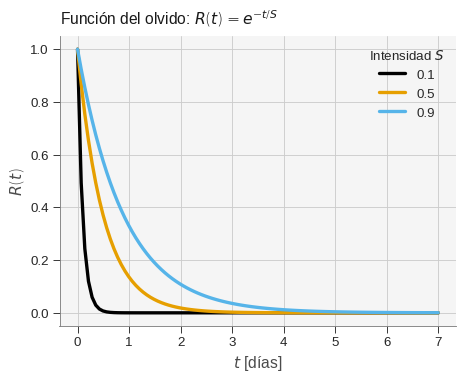

In [3]:
plt.title("Función del olvido: $R(t)=e^{-t/S}$")
plt.ylabel("$R(t)$")
plt.xlabel("$t$ [días]")

# Dominio
t = np.linspace(0,7,100)

for S in [0.1,0.5,0.9]:
    plt.plot(t, R(t,S), lw=3, label='{}'.format(S))

plt.legend(title = 'Intensidad $S$')
plt.show()

<a name='2-1'></a>
### ¿Cuánto tiempo dura el recuerdo?

¿Será posible determinar cada cuanto tiempo el estudiante debe repasar las palabras para que no las olvide y pueda ganar el concurso? ¿De qué depende esto?

Tomemos por ejemplo el caso de $S=0.9$ (curva azul). ¿En qué parte de la gráfica se incrementa el olvido? en otras palabras ¿en qué parte de la gráfica el descenso es más rápido?

Para conocer ese descenso, debemos calcular la pendiente $m$ y eso lo podemos hacer con la siguiente fórmula:

$$
m = \frac{R(t_2) - R(t_1)}{t_2 - t_1} \tag{1}
$$

donde $t_1$ y $t_2$ son dos tiempos distintos. Por ejemplo, para el día 1 y 2 tenemos lo siguiente:

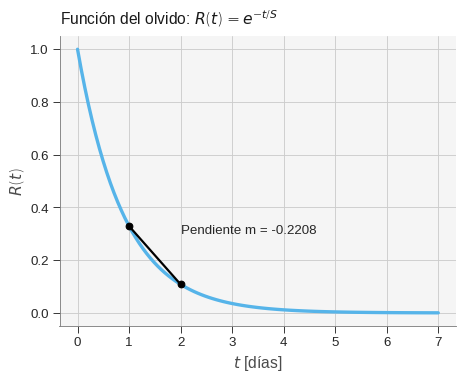

In [4]:
t1 = 1
t2 = 2
pendiente_m = (R(t2) - R(t1) ) / (t2-t1)

plt.title("Función del olvido: $R(t)=e^{-t/S}$")
plt.ylabel("$R(t)$")
plt.xlabel("$t$ [días]")
plt.text(2,0.3,'Pendiente m = {:5.4}'.format(pendiente_m))

plt.plot(t, R(t), lw=3, c='C02')
plt.plot([1,2], [R(1), R(2)], 'o-', zorder=5)
plt.show()

Observa que la pendiente es negativa, lo cual indica un decrecimiento. Como es obvio, el valor de la pendiente cambiará cuando $t_1$ y $t_2$ cambien. 

Si definimos $h = t_2 - t_1$ y $t = t_1$ podemos escribir la fórmula $(1)$ como sigue:

$$
m(t) = \frac{R(t + h) - R(t)}{h} \tag{2}
$$

En esta última fórmula vemos que la pendiente depende de $t$, es decir, en qué día nos encontramos.

Vamos a calcular $m$ para $h = 1$ y $t = [0,1,2,3,4,5,6]$:

In [5]:
h = 1.0
td = np.arange(0,8,h) # Definición de las t = 0,1,2,...,6
m = np.zeros(len(td)) # Arreglo para almacenar las pendientes

# Calculamos la pendiente usando la fórmula antes descrita
for i, t in enumerate(td):
    m[i] = (R(t + h) - R(t)) / h

# Ponemos la información en un DataFrame y la mostramos
tabla = pd.DataFrame(np.array([td, m]).T, columns = ['t', 'm(t)'])
tabla

,t,m(t)
0,0.0,-0.670807
1,1.0,-0.220825
2,2.0,-0.072694
3,3.0,-0.023930
4,4.0,-0.007878
5,5.0,-0.002593
6,6.0,-0.000854
7,7.0,-0.000281


Observa que la magnitud de la pendiente (su valor absoluto) disminuye conforme $t$  se incrementa. Es posible visualizar la pendiente uniendo los puntos con los que se realizó el cálculo de la misma, y también se puede graficar $m$ como función del tiempo, veamos ambas cosas en las siguientes gráficas:

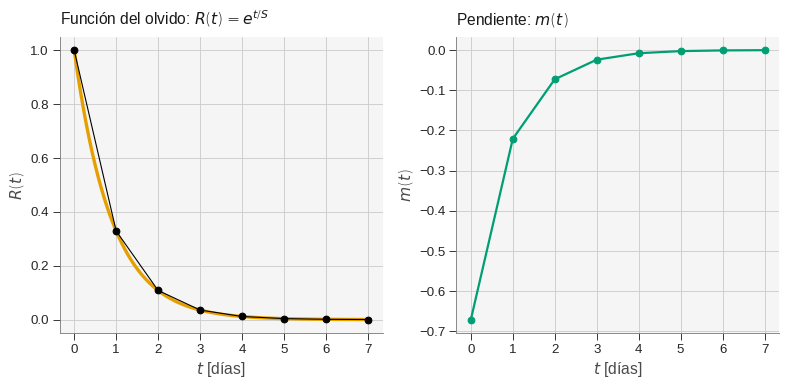

In [6]:
# Dominio
t = np.linspace(0,7,100)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.set_title("Función del olvido: $R(t)=e^{t/S}$")
ax1.set_xlabel("$t$ [días]")
ax1.set_ylabel("$R(t)$")

ax2.set_title("Pendiente: $m(t)$")
ax2.set_xlabel("$t$ [días]")
ax2.set_ylabel("$m(t)$")

ax1.plot(t,R(t),lw=3, c='C1')
ax1.plot(td,R(td), 'o-', lw=1, zorder=5)

ax2.plot(td,m,'o-', lw=2, c='C3')

plt.tight_layout()
plt.show()

En la gráfica de la izquierda, la línea negra nos muestra gráficamente el cambio en la pendiente de la recta que une los puntos de la gráfica de $R(t)$. En la gráfica de la derecha, observamos el cámbio de la pendiente $m$ en función de $t$.

Lo que estamos observando es la razón de cambio de $R(t)$ en intervalos de tiempo de longitud $h = 1$. Esto es lo que expresa la fórmula $(2)$. 

¿Será posible calcular **la razón de cambio instantáneo**? Para ello, esta razón debería calcularse en un solo instante de tiempo, lo cual implica que $t_1 = t_2 \Longrightarrow h = 0$, y esto nos lleva a que la fórmula de $m(t)$ no está bien definida (¡división por cero!). Pero, ¿qué pasa si $h$ se hace muy pequeña? es decir:

$$
\lim_{h \to 0}  \frac{R(t + h) - R(t)}{h} \tag{3}
$$

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1. ¿Qué pasa cuando $h \to 0$ para diferentes valores de $S$?.</font>**

<font color="DarkBlue">Ejecuta la siguiente celda de código para generar el interactivo en donde podrás modificar $S$, $h$ y $t$.</font>

---

In [9]:
%run zinteractivo1.ipynb

interactive(children=(FloatSlider(value=0.9, description='S', max=0.9, min=0.1, step=0.2), FloatSlider(value=1…

<function __main__.razonDeCambio(S, h, i0, anot)>

**Comentarios.**

Conforme $h$ se hace más pequeño, observamos que la línea roja se aproxima cada vez mejor a la línea tangente (azul) que pasa por el punto rojo. La línea roja representa una aproximación a la razón de cambio instantánea en el punto rojo.

En la gráfica de la derecha observamos la gráfica de $R^\prime(t)$ (curva azul), un punto verde que representa el valor exacto de $R^\prime(t)$ y un punto negro que es la aproximación para una $h$ dada.

Entonces, la tangente en el punto rojo, no es otra cosa que **la razón de cambio instantánea**. Veremos enseguida que ambas cosas se representan un concepto conocido como *la derivada de la función* en el punto rojo.

---

<a name='3'></a>
## Definición de derivada

La fórmula $(3)$ no es otra cosa que la definición formal de la derivada de una función. En casi todos los libros de cálculo encontrarás la siguiente notación para la derivada de la función $f(x)$:

$$ 
\frac{d f}{dx} = f^\prime(x)=\lim_{h \to 0} \frac{f(x + h) - f(x)}{h} 
$$

La derivada existe siempre y cuando exista este límite. ¿Puedes imaginar cuando este límite no existe? 

Observe que en la definición anterior se está calculando la pendiente de la función $f(x)$ en $x$. ¿Cuándo es que esta pendiente no se puede calcular?

---
<a name='ej-2'></a>
### **<font color="DodgerBlue">Ejercicio 2. Aproximación de la derivada hacia adelante y hacia atrás.</font>**

<font color="DarkBlue">Ejecute la siguiente celda de código. Obtendrás un interactivo en donde podrás modificar $S$, $h$ y $t$.</font>

---

In [8]:
%run zinteractivo2.ipynb

interactive(children=(FloatSlider(value=1.0, description='h', max=2.0, min=0.1), FloatSlider(value=6.0, descri…

<function __main__.derivada(h, x0, back)>